Para predecir la cardiopatía de los pacientes nos basamos en las 14 caracteristicas presentes en nuestro dataset.

Las siguientes son:

-Age: Edad en años

-Sex: Genero

-Cp: Tipo de dolor toráxico

-Trestbps: Tensión arterial en reposo (en mm Hg al ingreso en el hospital)

-Chol: Colesterol sérico en mg/dl

-Fbs: Fasting blood sugar >(glucemia en ayunas > 120 mg/dl)

-Restecg: Resultados electrocardiográficos en reposo

-Exang: Angina inducida por el ejercicio

-Oldpeak: Depresión del ST inducida por el ejercicio en relación con el reposo

Anotacion: La abreviatura "ST" se refiere a los segmentos ST en un electrocardiograma (ECG o EKG), que es una representación gráfica de la actividad eléctrica del corazón.

-Slope: La pendiente del segmento ST de ejercicio máximo

-Ca: Número de vasos principales (0-3) coloreados por flouroscopia

-Thal: Es un trastorno sanguíneo que se transmite de padres a hijos (hereditario) en el cual el cuerpo produce una forma anormal o una cantidad inadecuada de hemoglobina, la proteína en los glóbulos rojos que transporta el oxígeno.

-Variable objetivo (target)

In [1]:
#importamos librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#leemos el archivo csv
df_cardiop = pd.read_csv('heart.csv')

In [3]:
#imprimimos las primeras 5 filas
df_cardiop.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Miramos los ultimos 5 registros para conocer la distribucion de los datos

In [4]:
df_cardiop.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


La distribucion es similarmente uniforme

In [5]:
#forma del dataset
df_cardiop.shape

(303, 14)

In [6]:
#informacion detallada del dataset
df_cardiop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
#comprobamos existencia de valores faltantes
df_cardiop.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Como podemos observar no presentamos ninguna columna con valores faltantes por lo cual no es necesaria la eliminacion de ninguna de ellas 

Representemos la distribucion de edades en el conjunto de datos

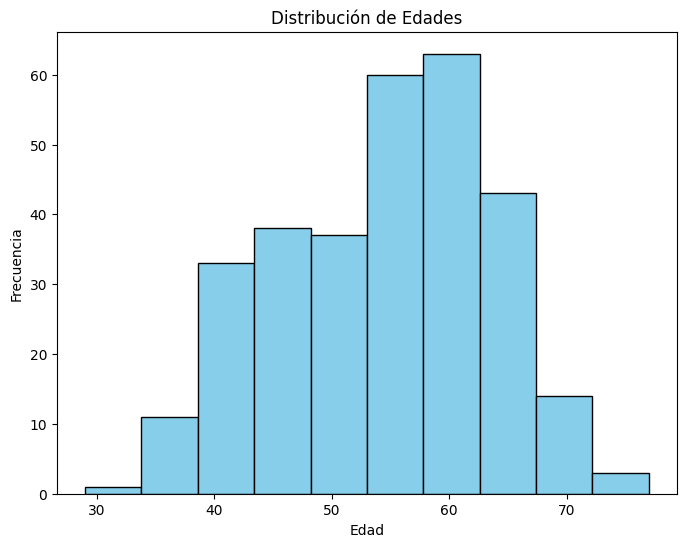

In [8]:
# Crear un histograma
plt.figure(figsize=(8, 6))
plt.hist(df_cardiop['age'], bins=10, color='skyblue', edgecolor='black')

# Configuración del gráfico
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

Ahora veamos la distribucion de edades en aquellos pacientes que dieron positivo en la variable objetivo

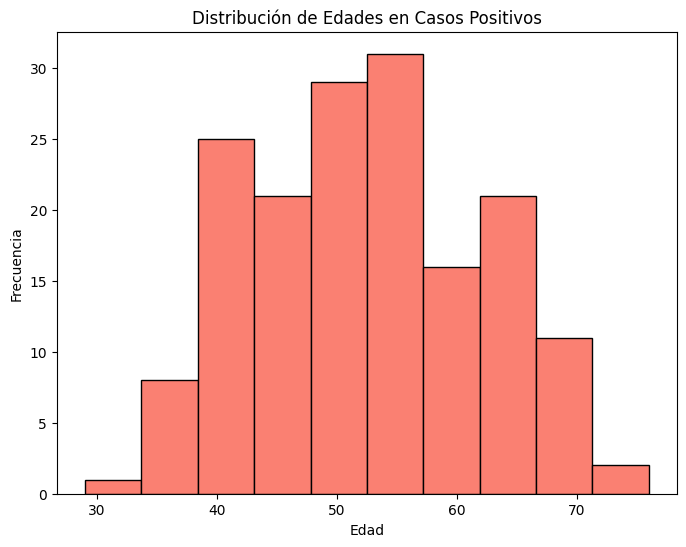

In [9]:
# Filtrar el DataFrame para incluir solo aquellos con target=1
positive_cases = df_cardiop[df_cardiop['target'] == 1]

# Crear un histograma para la distribución de edades en casos positivos
plt.figure(figsize=(8, 6))
plt.hist(positive_cases['age'], bins=10, color='salmon', edgecolor='black')

# Configuración del gráfico
plt.title('Distribución de Edades en Casos Positivos')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

Denotamos una tendencia bastante regular en pacientes de mediana edad, no asi, en pacientes mas jovenes o longevos

Creamos un boxplot de edades para verificar la existencia de algun valor outlier

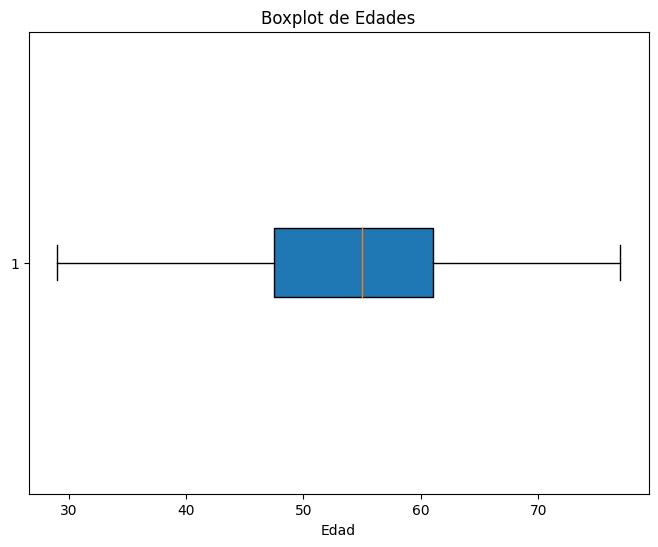

In [10]:
# Crear un boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df_cardiop['age'], vert=False, patch_artist=True)

# Configuración del gráfico
plt.title('Boxplot de Edades')
plt.xlabel('Edad')

# Mostrar el boxplot
plt.show()

No hay presencia de outliers en el campo 'age'

Ahora creamos un boxplot de la edad segun la variable objetivo

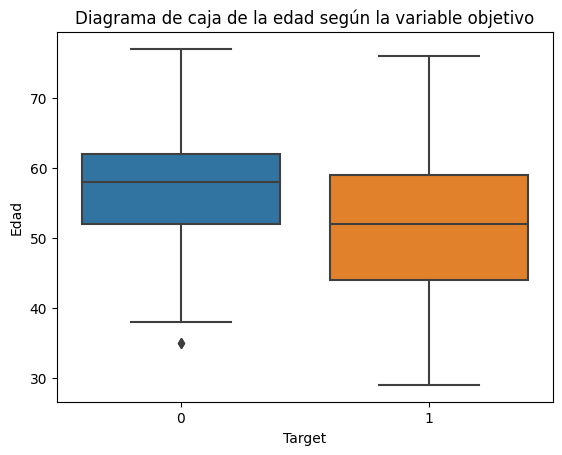

In [11]:
# Crear un diagrama de caja de la edad según la variable objetivo
sns.boxplot(x="target", y="age", data=df_cardiop)
plt.xlabel("Target")
plt.ylabel("Edad")
plt.title("Diagrama de caja de la edad según la variable objetivo")
plt.show()

Vemos que hay un minimo de outliers dentro de los casos negativos

Ahora veamos la distribucion de la variable objetivo

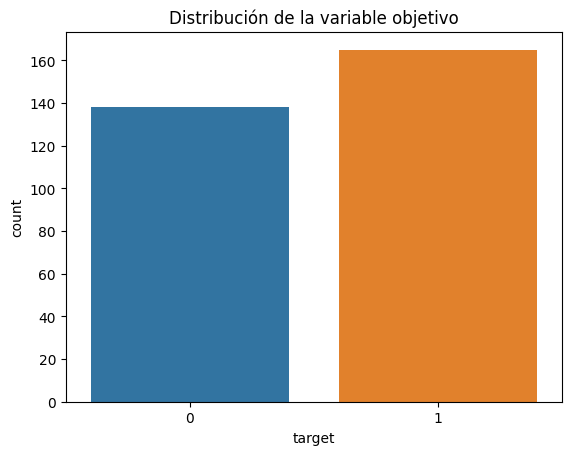

In [12]:
sns.countplot(x='target', data=df_cardiop)
plt.title('Distribución de la variable objetivo')
plt.show()

Hay mas pacientes positivos en cardiopatía

Relaciones entre variables

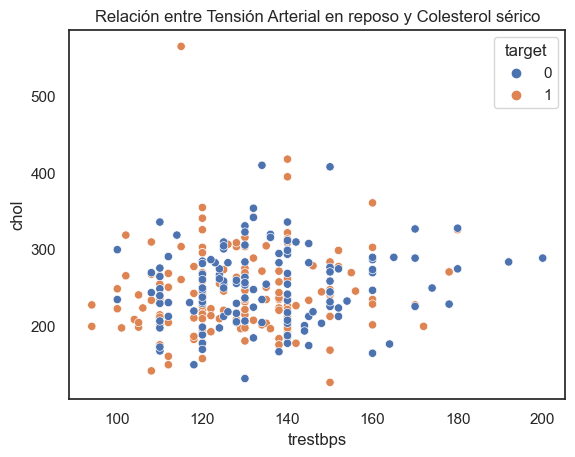

In [64]:
sns.scatterplot(x='trestbps', y='chol', hue='target', data=df_cardiop)
plt.title('Relación entre Tensión Arterial en reposo y Colesterol sérico')
plt.show()


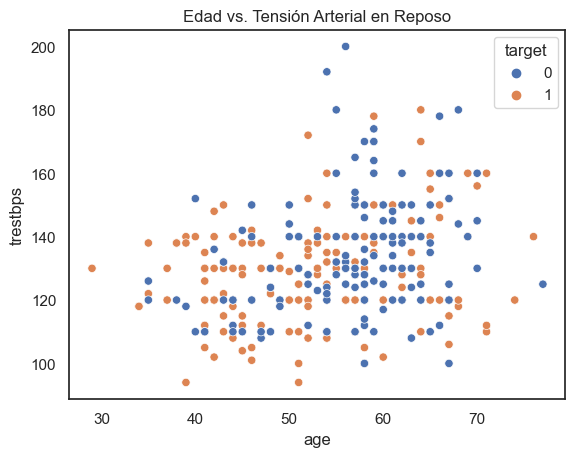

In [65]:
sns.scatterplot(x='age', y='trestbps', hue='target', data=df_cardiop)
plt.title('Edad vs. Tensión Arterial en Reposo')
plt.show()

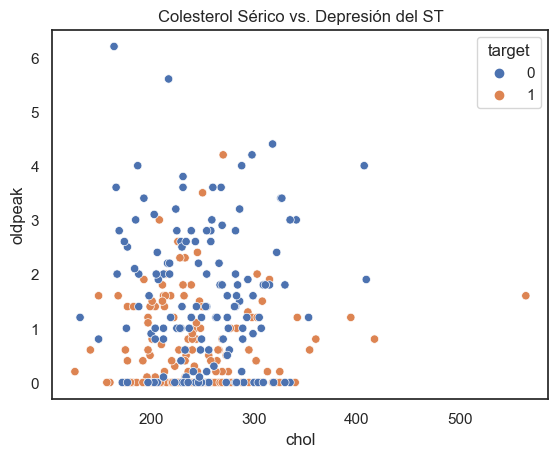

In [66]:
sns.scatterplot(x='chol', y='oldpeak', hue='target', data=df_cardiop)
plt.title('Colesterol Sérico vs. Depresión del ST')
plt.show()

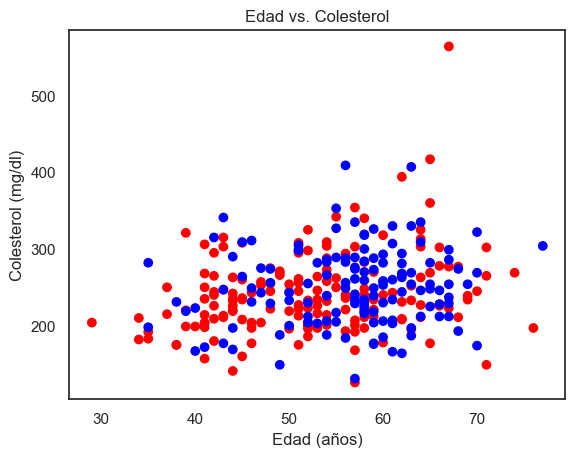

In [67]:
# Extraer las columnas de edad, colesterol y target
edad = df_cardiop["age"]
colesterol = df_cardiop["chol"]
target = df_cardiop["target"]

# Crear el gráfico de dispersión con los colores según el target
plt.scatter(edad, colesterol, c=target, cmap="bwr")

# Añadir los títulos de los ejes y el gráfico
plt.xlabel("Edad (años)")
plt.ylabel("Colesterol (mg/dl)")
plt.title("Edad vs. Colesterol")

# Mostrar el gráfico
plt.show()

Como se puede observar no hay una correlacion clara entre las variables anteriores, y que los puntos estan dispersos por todo el grafico.

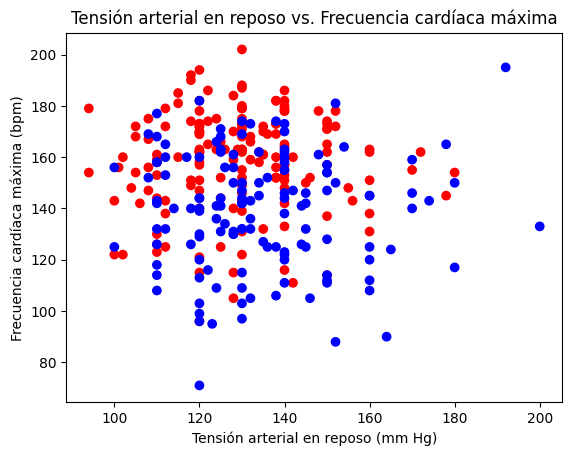

In [19]:
# Extraer las columnas de tensión arterial en reposo, frecuencia cardíaca máxima y target
tension = df_cardiop["trestbps"]
frecuencia = df_cardiop["thalach"]
target = df_cardiop["target"]

# Crear el gráfico de dispersión con los colores según el target
plt.scatter(tension, frecuencia, c=target, cmap="bwr")

# Añadir los títulos de los ejes y el gráfico
plt.xlabel("Tensión arterial en reposo (mm Hg)")
plt.ylabel("Frecuencia cardíaca máxima (bpm)")
plt.title("Tensión arterial en reposo vs. Frecuencia cardíaca máxima")

# Mostrar el gráfico
plt.show()

Hay una correlación negativa entre la tensión arterial en reposo y la frecuencia cardíaca máxima, es decir, a mayor tensión, menor frecuencia. Esto se debe a que la tensión arterial es una medida de la resistencia que ofrece el sistema circulatorio al flujo sanguíneo, y la frecuencia cardíaca es una medida de la cantidad de veces que el corazón late por minuto. A mayor resistencia, el corazón tiene que trabajar más para bombear la sangre, y por lo tanto, su frecuencia disminuye. También se observa una diferencia entre los grupos de target, ya que los puntos azules (target = 0) tienden a tener valores más altos de tensión y más bajos de frecuencia que los puntos naranjas (target = 1). Esto sugiere que estos dos factores pueden ser predictores de la cardiopatía.

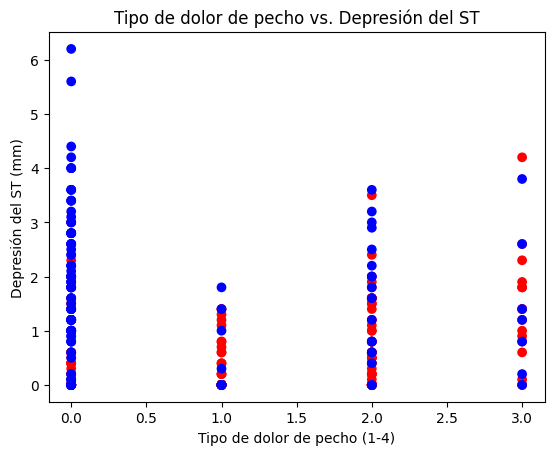

In [20]:
# Extraer las columnas de tipo de dolor de pecho, depresión del ST y target
dolor = df_cardiop["cp"]
depresion = df_cardiop["oldpeak"]
target = df_cardiop["target"]

# Crear el gráfico de dispersión con los colores según el target
plt.scatter(dolor, depresion, c=target, cmap="bwr")

# Añadir los títulos de los ejes y el gráfico
plt.xlabel("Tipo de dolor de pecho (1-4)")
plt.ylabel("Depresión del ST (mm)")
plt.title("Tipo de dolor de pecho vs. Depresión del ST")

# Mostrar el gráfico
plt.show()

Como se puede ver, hay una correlación positiva entre el tipo de dolor de pecho y la depresión del ST, es decir, a mayor tipo de dolor, mayor depresión. Esto tiene sentido, ya que el tipo de dolor de pecho es una medida de la severidad del dolor, y la depresión del ST es una medida de la alteración eléctrica del corazón. A mayor severidad del dolor, mayor alteración eléctrica. También se aprecia una diferencia entre los grupos de target, ya que los puntos azules (target = 0) tienden a tener valores más bajos de tipo de dolor y de depresión que los puntos rojos (target = 1). Esto indica que estos dos síntomas pueden ser predictores de la cardiopatía.

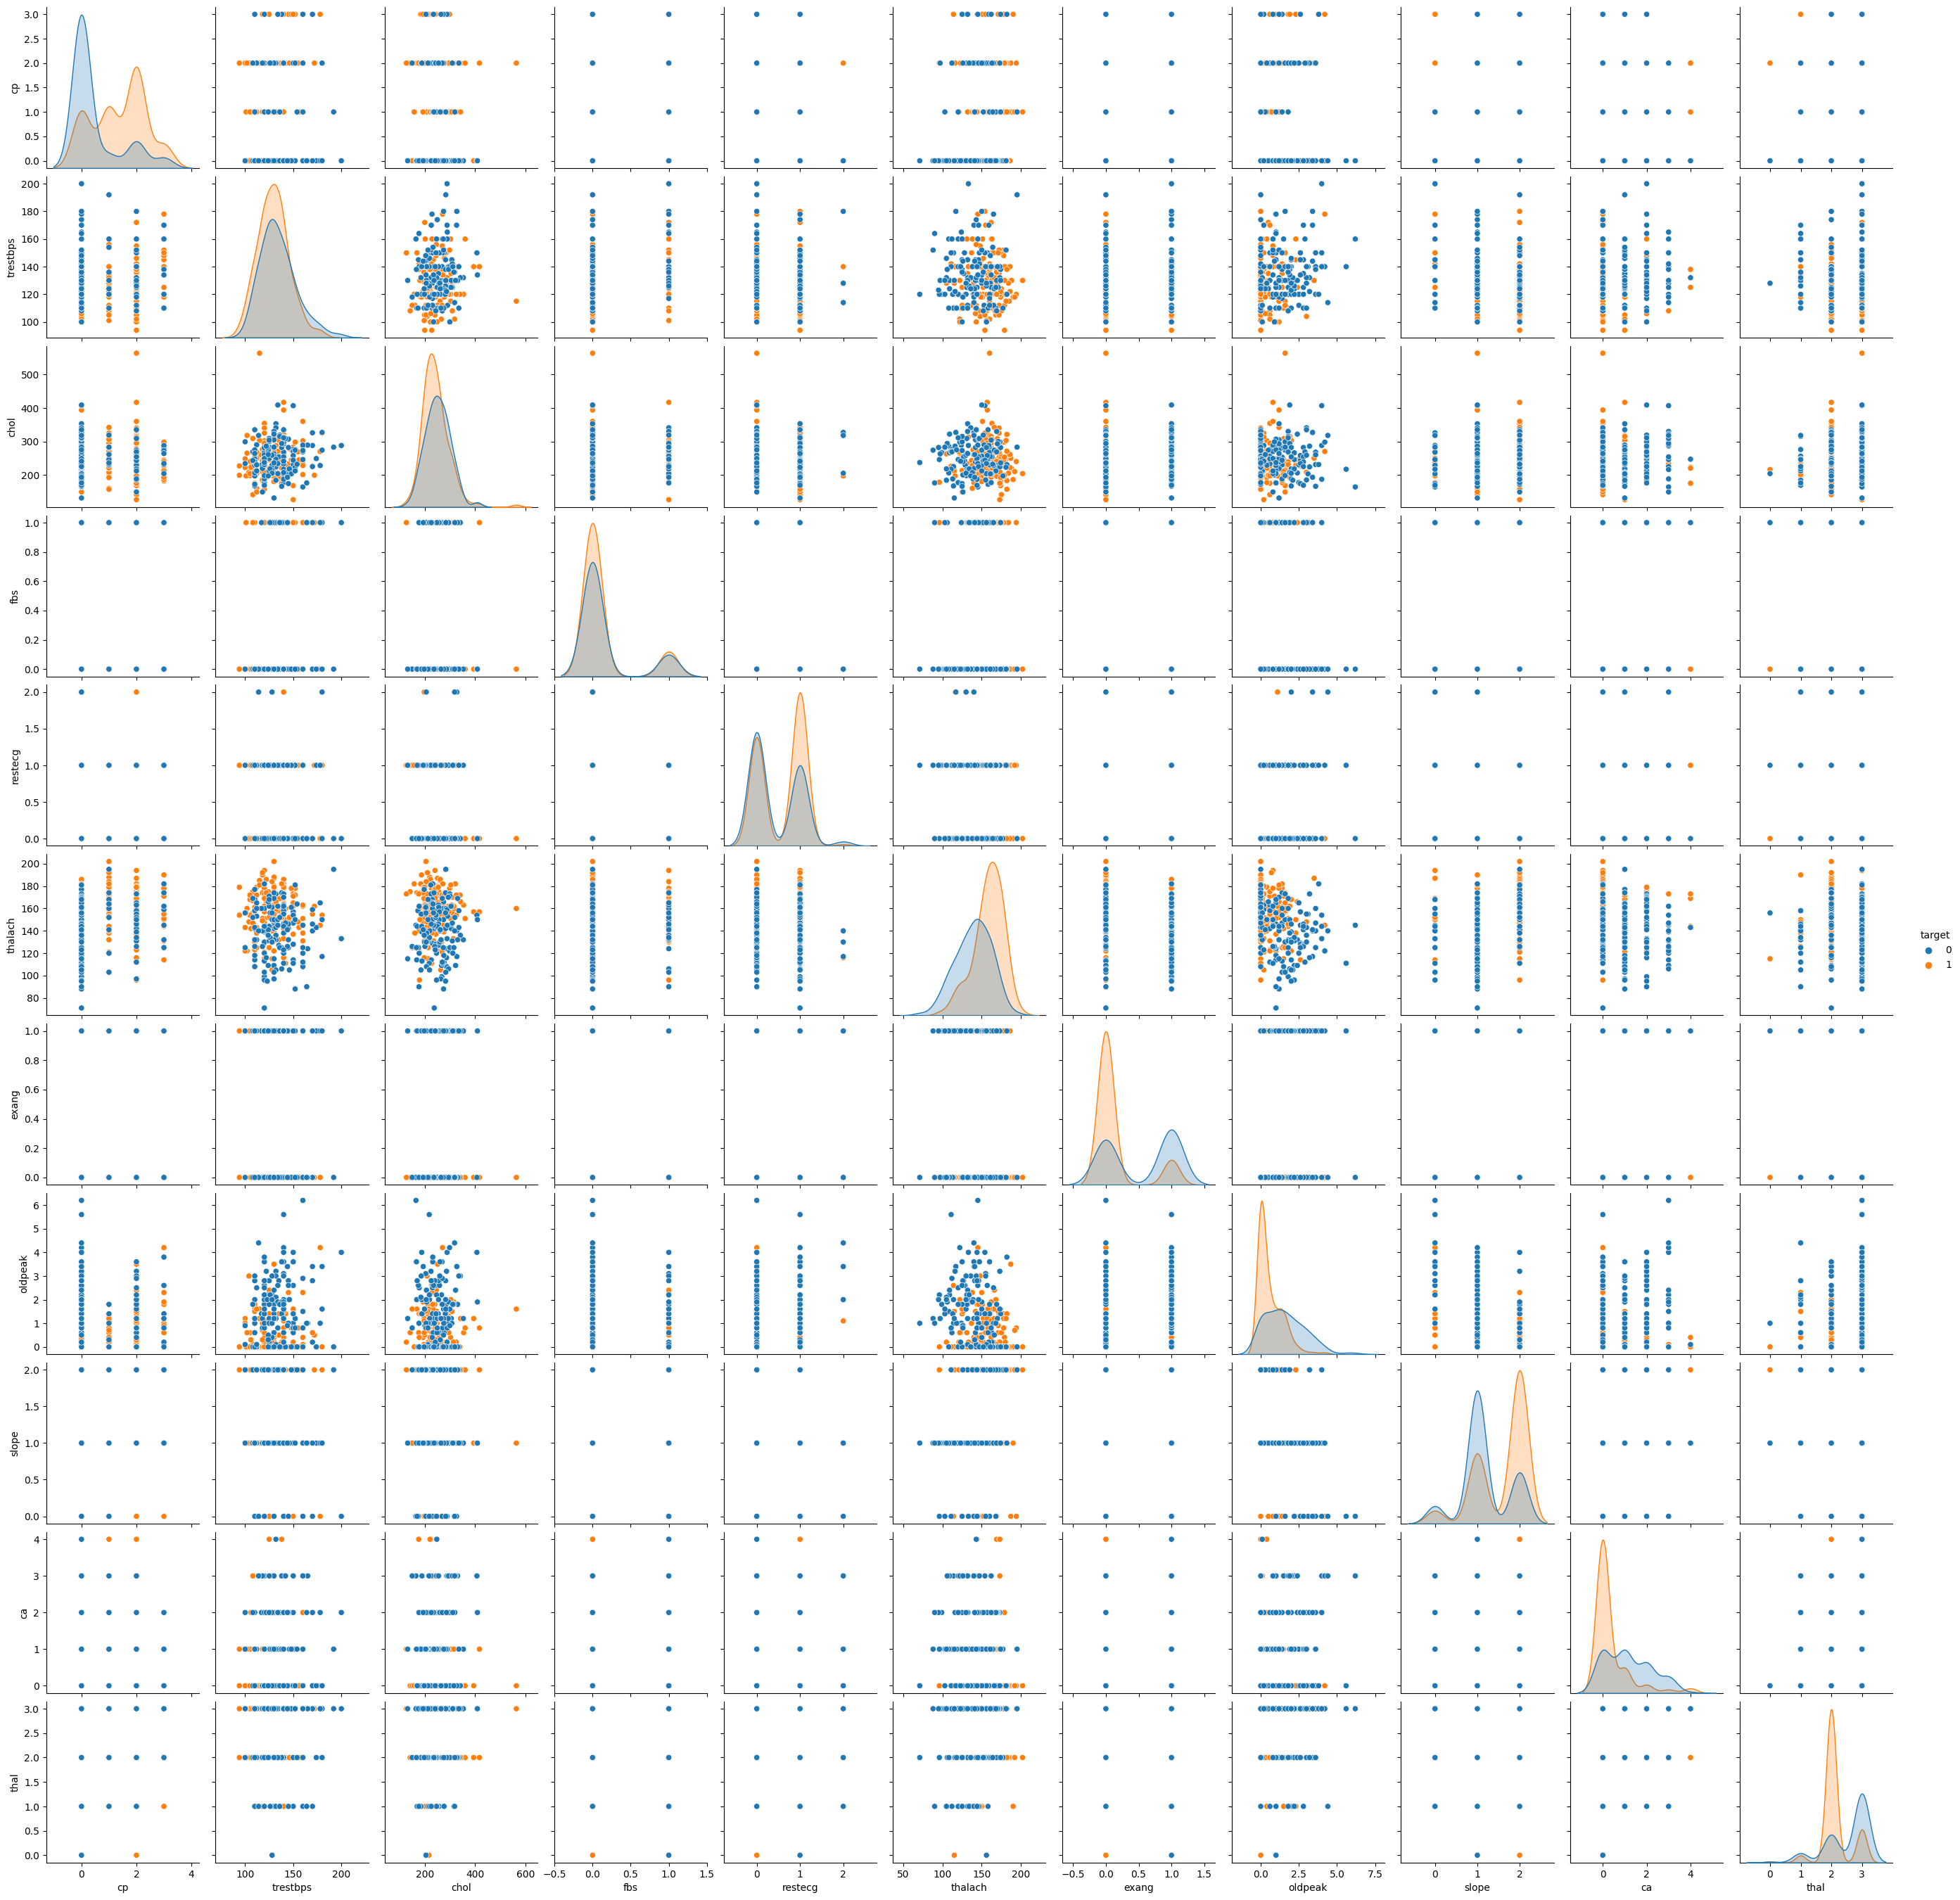

In [21]:
sns.pairplot(df_cardiop, hue = 'target', 
             vars = ['cp', 'trestbps', 'chol',
                     'fbs', 'restecg', 'thalach',
                     'exang', 'oldpeak', 'slope', 'ca', 'thal'])

La variable cp (tipo de dolor en el pecho) parece tener una influencia importante en la variable target. Los pacientes con cp = 4 (dolor asintomático) tienen más probabilidades de tener una enfermedad cardíaca que los que tienen cp = 1, 2 o 3 (dolor típico, atípico o no relacionado con el corazón).

La variable thalach (frecuencia cardíaca máxima alcanzada) también muestra una relación positiva con la variable target. Los pacientes con una frecuencia cardíaca más alta tienden a tener menos enfermedad cardíaca que los que tienen una frecuencia cardíaca más baja.

La variable exang (angina inducida por el ejercicio) muestra una relación negativa con la variable target. Los pacientes que experimentan angina al hacer ejercicio tienen más probabilidades de tener una enfermedad cardíaca que los que no la experimentan.

La variable oldpeak (depresión del segmento ST inducida por el ejercicio en relación con el reposo) también muestra una relación negativa con la variable target. Los pacientes con una mayor depresión del segmento ST tienen más probabilidades de tener una enfermedad cardíaca que los que tienen una menor depresión.

La variable slope (pendiente del segmento ST en el pico del ejercicio) muestra una relación positiva con la variable target. Los pacientes con una pendiente ascendente (slope = 1) tienen menos probabilidades de tener una enfermedad cardíaca que los que tienen una pendiente plana (slope = 2) o descendente (slope = 3).

La variable ca (número de vasos principales coloreados por fluoroscopia) muestra una relación negativa con la variable target. Los pacientes con más vasos coloreados tienen más probabilidades de tener una enfermedad cardíaca que los que tienen menos vasos coloreados.

La variable thal (defecto cardíaco detectado por talio) muestra una relación negativa con la variable target. Los pacientes con un defecto normal (thal = 3) tienen menos probabilidades de tener una enfermedad cardíaca que los que tienen un defecto reversible (thal = 2) o fijo (thal = 1).

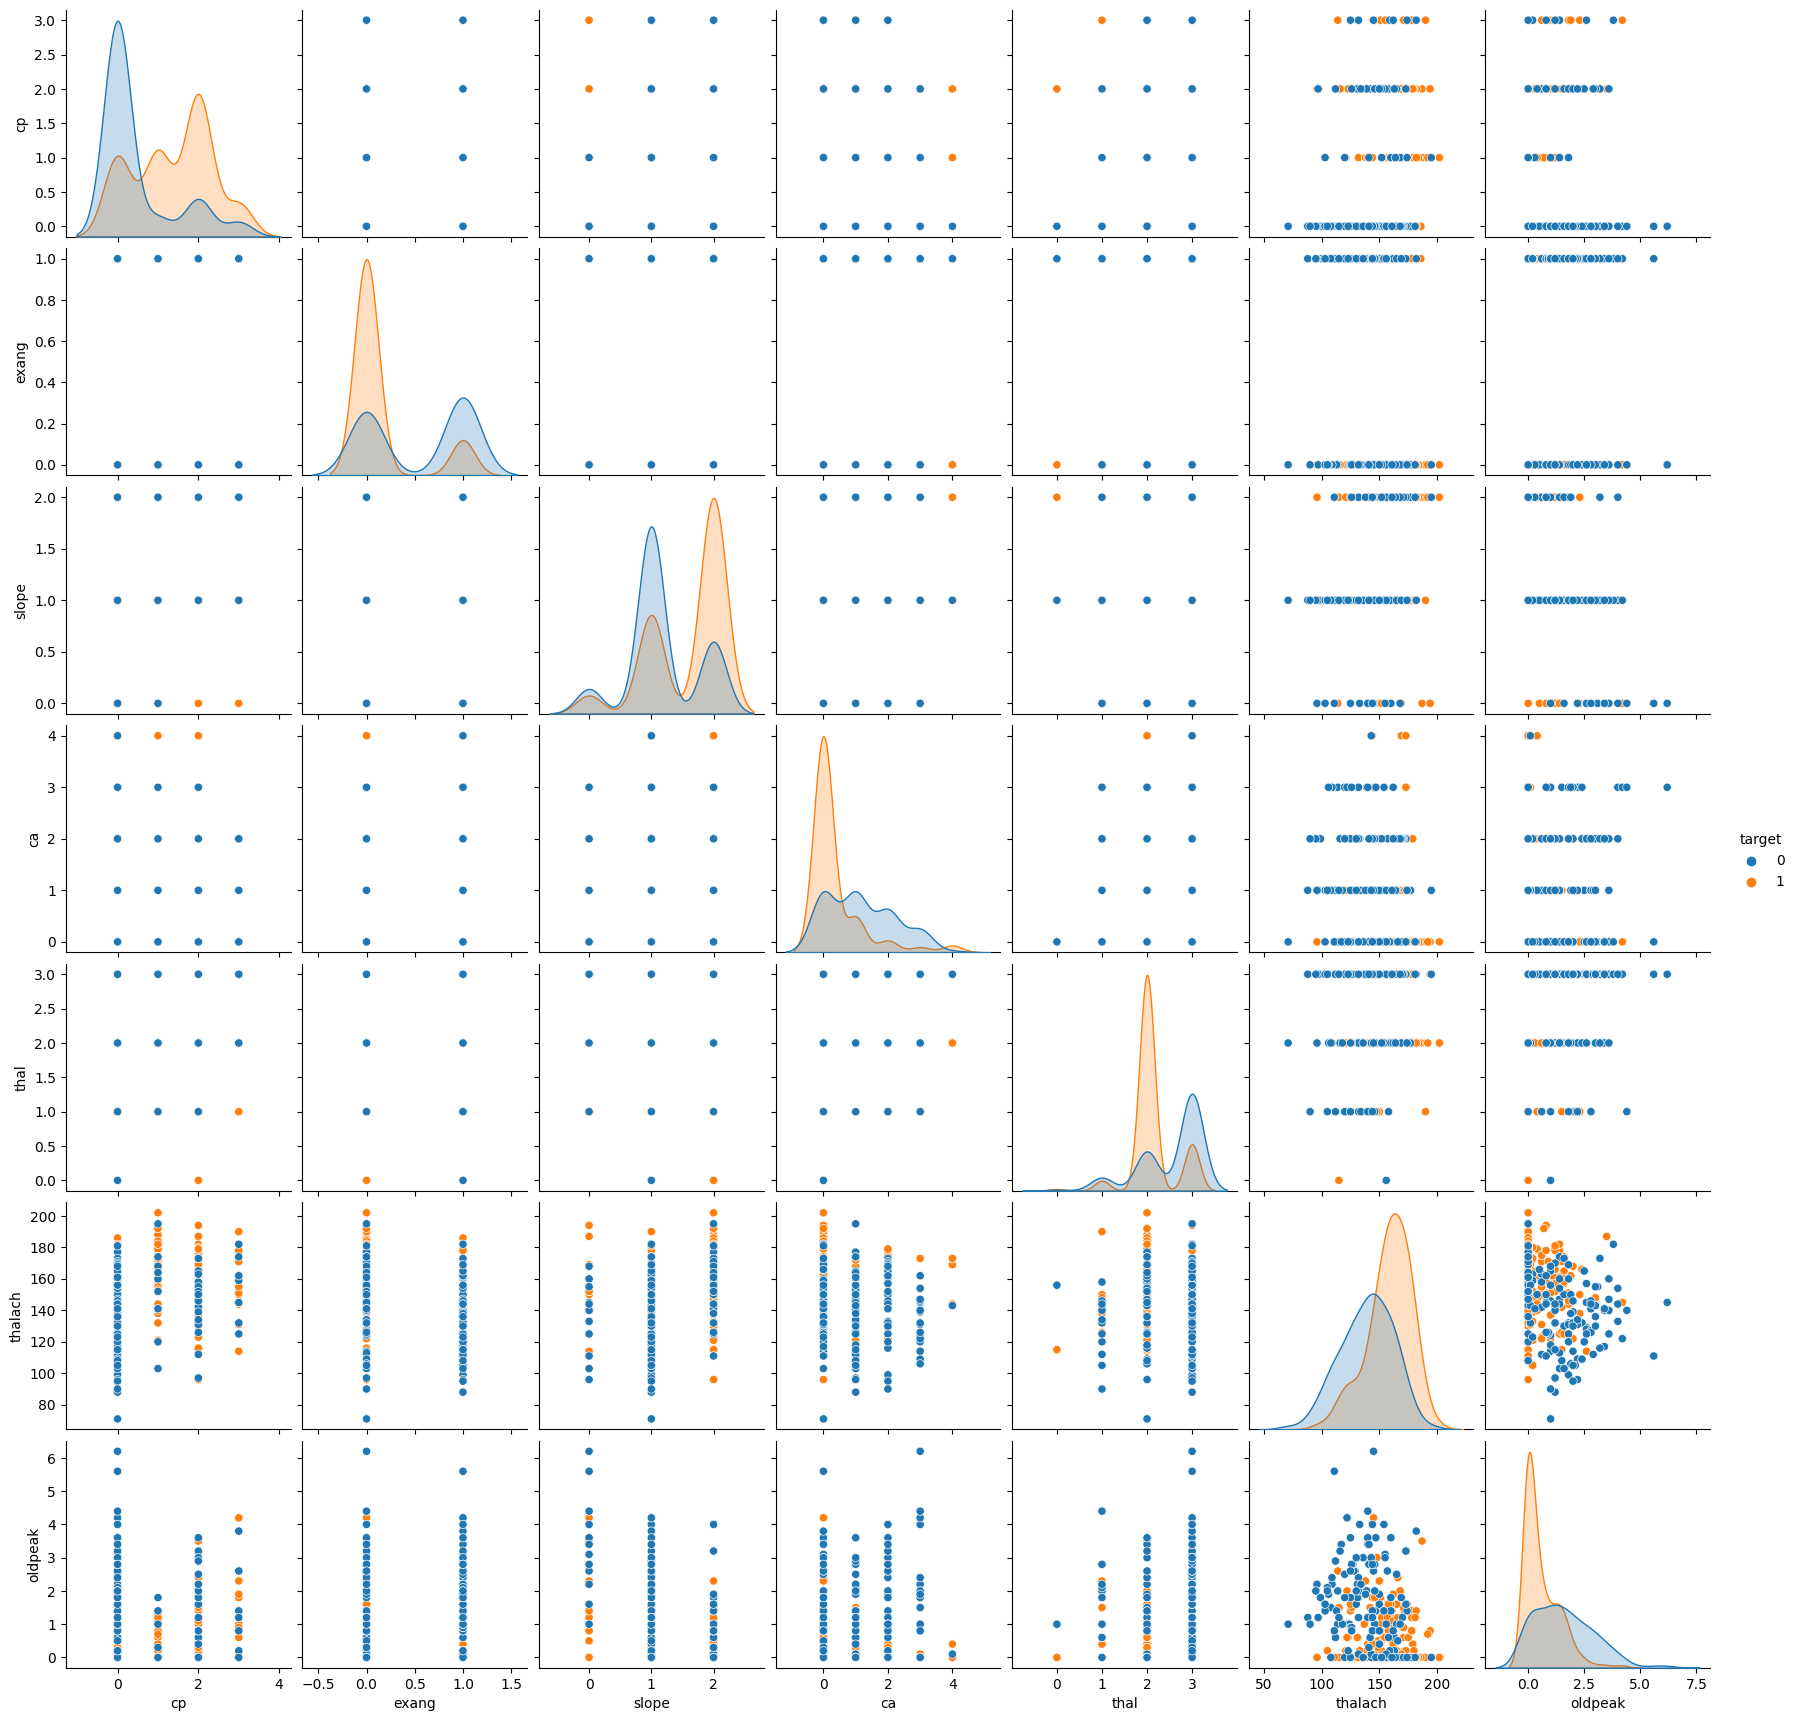

In [22]:
sns.pairplot(df_cardiop, hue = 'target', 
             vars = ['cp', 'exang','slope', 'ca','thal', 'thalach',
                      'oldpeak'])

Con el grafico anterior verificamos las conclusiones extraidas del primer grafico

Creamos un grafico de correlaciones para contrastar y complementar los analisis anteriores

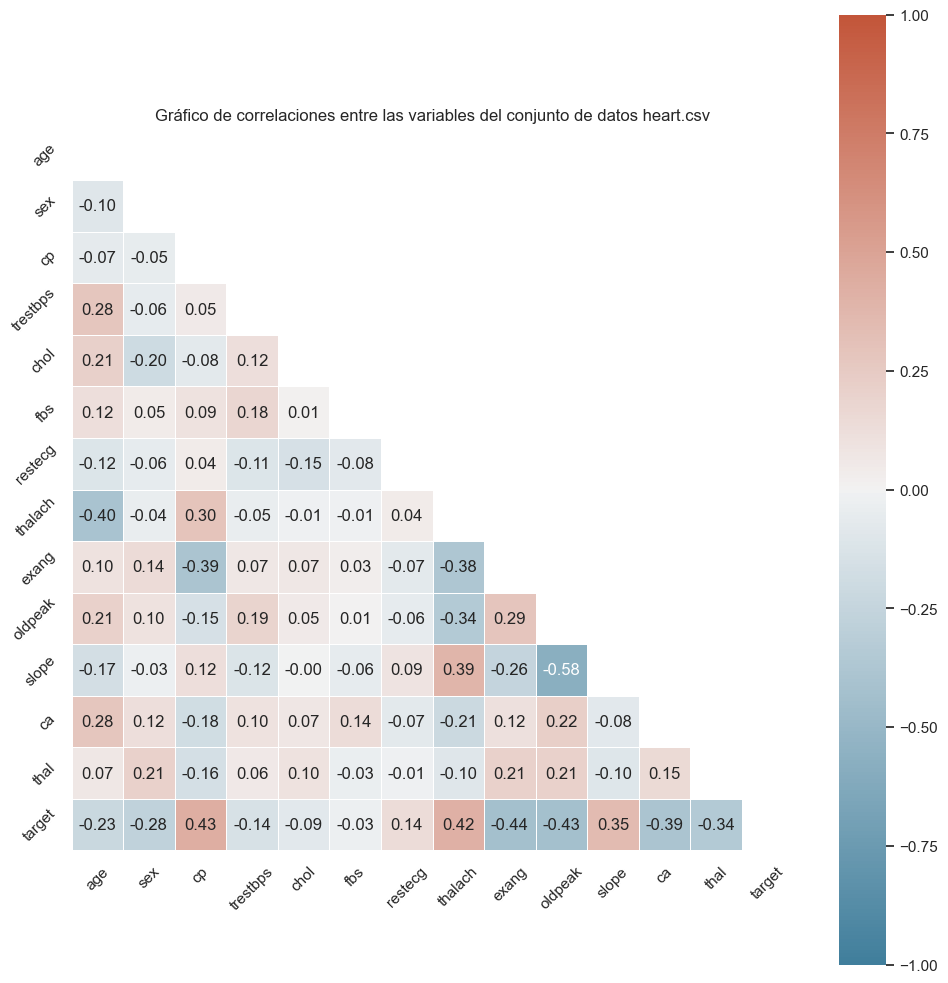

In [23]:
# Calcular la matriz de correlación
corr = df_cardiop.corr()

# Crear una máscara para ocultar la mitad superior de la matriz
mask = np.triu(np.ones_like(corr, dtype=bool))

# Establecer el estilo y el tamaño del gráfico
sns.set_theme(style="white")
plt.figure(figsize=(10, 10))

# Generar una paleta de colores divergente
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Dibujar el mapa de calor con la máscara y el rango de colores adecuados
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, annot=True, fmt=".2f")

# Ajustar el título y los ejes del gráfico
plt.title("Gráfico de correlaciones entre las variables del conjunto de datos heart.csv")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Como podemos observar otras variables tienen una correlación moderada o débil, como trestbps, chol, fbs, restecg y age.

En conclusion, nos quedaremos con las variables 'cp', 'exang','slope', 'ca','thal', 'thalach' y 'oldpeak' para el modelo de deteccion de cardiopatía

Lo siguiente es eliminar las variables que no aporten al modelo y crear nuestro modelo de predicción

In [80]:
unwantedcolumnlist = ["age", "sex", "trestbps", "chol", "fbs", "restecg", "thalach"]

In [81]:
X = df_cardiop.drop(unwantedcolumnlist, axis=1)

In [82]:
y = df_cardiop['target']

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=5)

Los vectores de soporte son los puntos de datos más cercanos al hiperplano, los puntos de un conjunto de datos que, si se quitaran, alterarían la posición del hiperplano divisor. Por esta razón, pueden considerarse los elementos críticos de un conjunto de datos.

¿Qué es un hiperplano?

Como ejemplo simple, para una tarea de clasificación con solo dos características, se puede pensar en un hiperplano como una línea que separa y clasifica linealmente un conjunto de datos.

De manera intuitiva, mientras más alejados estén nuestros puntos de datos del hiperplano, más seguros estamos de que han sido clasificados correctamente. Por lo tanto, queremos que nuestros puntos de datos estén lo más lejos posible del hiperplano, pero aún en el lado correcto de este.

Entonces, cuando se agrega nueva información de prueba, el lado del hiperplano en el que caiga determinará la clase que le asignamos.

¿Cómo encontramos el hiperplano correcto?

O, en otras palabras, ¿cómo segregamos mejor las dos clases dentro de los datos?

La distancia entre el hiperplano y el punto de datos más cercano de cualquiera de los conjuntos se conoce como margen. El objetivo es elegir un hiperplano con el margen más grande posible entre el hiperplano y cualquier punto dentro del conjunto de entrenamiento, lo que aumenta la probabilidad de clasificar correctamente nuevos datos.

In [84]:
from sklearn.svm import SVC 
from sklearn.metrics import classification_report, confusion_matrix

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [85]:
y_predict = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
cm

array([[30,  0],
       [ 0, 31]], dtype=int64)

<Axes: >

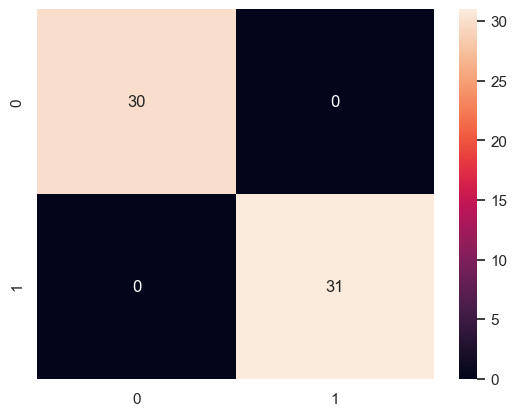

In [86]:
sns.heatmap(cm, annot=True)

In [87]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        31

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61



In [88]:
min_train = X_train.min()
min_train

cp         0.0
exang      0.0
oldpeak    0.0
slope      0.0
ca         0.0
thal       0.0
target     0.0
dtype: float64

In [89]:
range_train = (X_train - min_train).max()
range_train

cp         3.0
exang      1.0
oldpeak    6.2
slope      2.0
ca         4.0
thal       3.0
target     1.0
dtype: float64

En relacion al modelo anterior, obtuvimos un f1-score de 1.0, lo cual sigfinica que el modelo clasifico bien todas las predicciones, esto no tiene porque ser algo significativamente bueno, ya que, un modelo perfecto puede significar un sobreajuste de los datos, es decir, que el modelo se memoriza los datos presentes y sus posibles variaciones pero que podría presentar problemas a la hora de incorporar nuevos datos. Sin embargo, despues de testear con distintos modelos como la regresion logistica y arboles de decision, obtuve resultados similares, por lo cual, mi conclusión es que al manipular un dataset con una cantidad de datos relativamente pequeña es mas probable obtener un score alto, por lo cual, simplemente voy a optar por utilizar la maquina de soporte vectorial sin mucho más ajuste por hacer.